<a href="https://colab.research.google.com/github/codejawk/GRIP-THE_SPARKS_FOUNDATION/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 3 - To Explore Unsupervised Mchine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.



In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns



In [76]:
irisdata=pd.read_csv("Iris.csv")

In [77]:
irisdata.shape

(150, 6)

In [78]:
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
irisdata.drop(labels='Id',axis=1,inplace=True)

STATISTICAL SUMMARY


In [80]:
#DESCRIPTION
print(irisdata.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [81]:
#class distribution
print(irisdata.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


DATA VISUALISATION


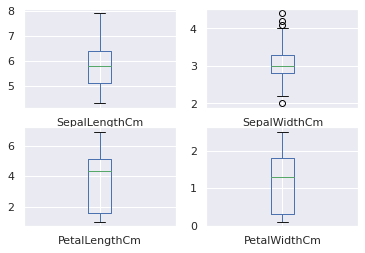

In [82]:
#plt.figure(figsize=(4,4))
irisdata.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

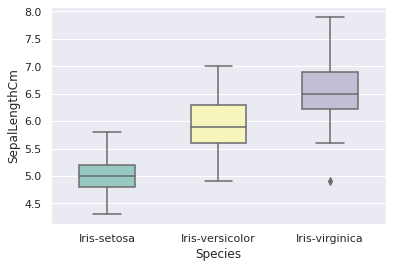

In [83]:
#Boxplots of Sepal lengths by Different Species of Iris
sns.boxplot(y='SepalLengthCm',x='Species', data=irisdata, width=0.5, palette="Set3")

In [91]:
#Generating Correlation Heatmap
col=irisdata.columns[0:-1]
col

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

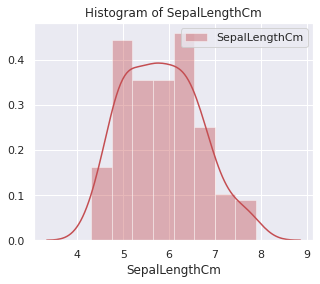

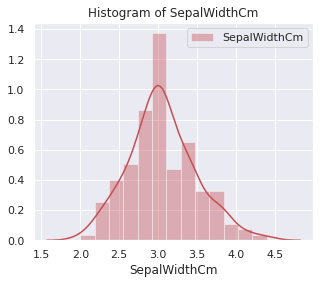

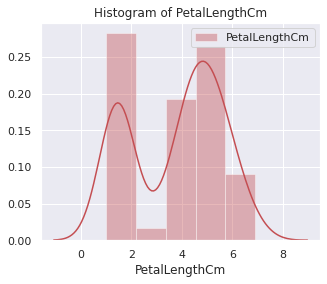

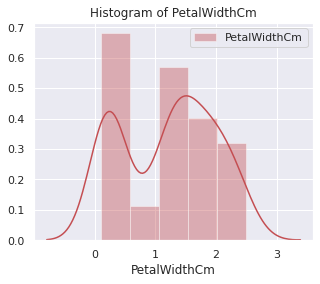

In [95]:
#histogram
col=irisdata.columns[0:-1]
for i in col:
  plt.figure(figsize=(5,4)) # figure ration 16:9
  sns.set()
  sns.distplot(irisdata[i],label=i,color='r')
  plt.title("Histogram of {}".format(i)) # for histogram title
  plt.legend() #for label



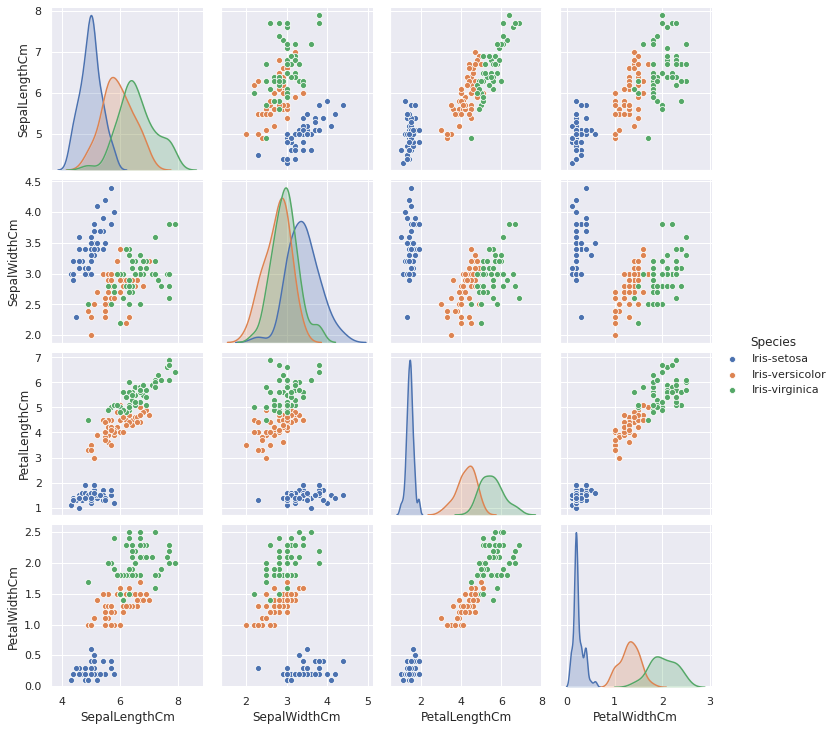

In [101]:

sns.pairplot(irisdata.iloc[:,[0,1,2,3,4]],hue='Species')

In [110]:
irisdata['Species'] = pd.Categorical(irisdata["Species"])
irisdata["Species"] = irisdata["Species"].cat.codes

**EVALUATE SOME ALGORITHMS**

In [111]:
#CREATE A VALIDATION DATASET
irisdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [112]:
from sklearn.model_selection import train_test_split
arr=irisdata.values
X=arr[:,0:4]
y=arr[:,4]
validation_size=0.20
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=validation_size,random_state=seed)

In [113]:
print(X_train.size)
print(X_test.size)

480
120


BUILD MODELS:-- here i will spot check on some linear(logistic Regression and Linear Discriminant analysis) and some nonlinear(KNN, CART,Naive Bayes,SVM etc) on the dataset

# spot-check algos

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline



In [133]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.958333 (0.076830)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.958333 (0.076830)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)



so we can use KNN as it shows maximum accuracy,

In [123]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.85      0.92      0.88        12
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# Improve Results With Tuning


In [141]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [158]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
centroids = km.cluster_centers_
print(centroids)

[[5.01395349 3.4255814  1.46511628 0.25116279]
 [5.93191489 2.71489362 4.34468085 1.40425532]
 [6.85333333 3.07333333 5.79333333 2.10333333]]


Text(0.5, 1.0, 'Elbow Method Visualisation')

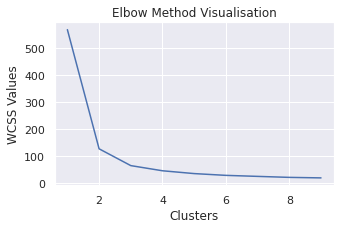

In [146]:
from sklearn.cluster import KMeans
import statistics as st
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)

wcss=[]
K_rng=10

for i in range(1,K_rng):
    K=KMeans(i)
    K.fit(X_train)
    w=K.inertia_
    wcss.append(w)
    
Clusters=range(1,K_rng)
plt.figure(figsize=(5,3))
plt.plot(Clusters,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values') #Within Cluster Sum of Squares
plt.title('Elbow Method Visualisation')

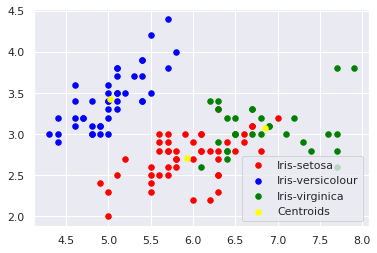

In [150]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)


plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'yellow', label = 'Centroids')
plt.legend()

Text(0.5, 1.0, 'Predicted')

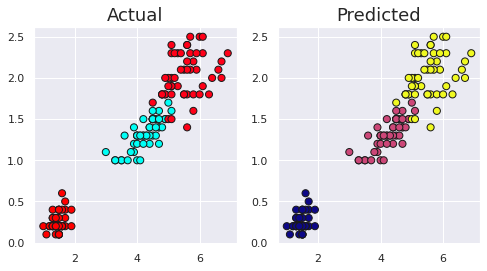

In [156]:

new_labels=km.labels_
fig,axes=plt.subplots(1,2,figsize=(8,4))
axes[0].scatter(X[:,2],X[:,3],c=y,cmap='hsv',edgecolor='k',s=50)
axes[1].scatter(X[:,2],X[:,3],c=y,cmap='plasma',edgecolor='k',s=50)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)


#Lets predict on custom input value

In [159]:
X_km=np.array([[1 ,1, 1, 1]])

X_km_prediction=km.predict(X_km)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Iris-Versicolor
